In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import  KElbowVisualizer
from sklearn.neighbors import LocalOutlierFactor

In [80]:
df = pd.read_csv('./assets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [82]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [83]:
df['Gender'] = df['Gender'].apply(lambda g: 0 if g == 'Male' else 1)
df.drop(columns=['CustomerID'], inplace=True)

## Escolhendo features

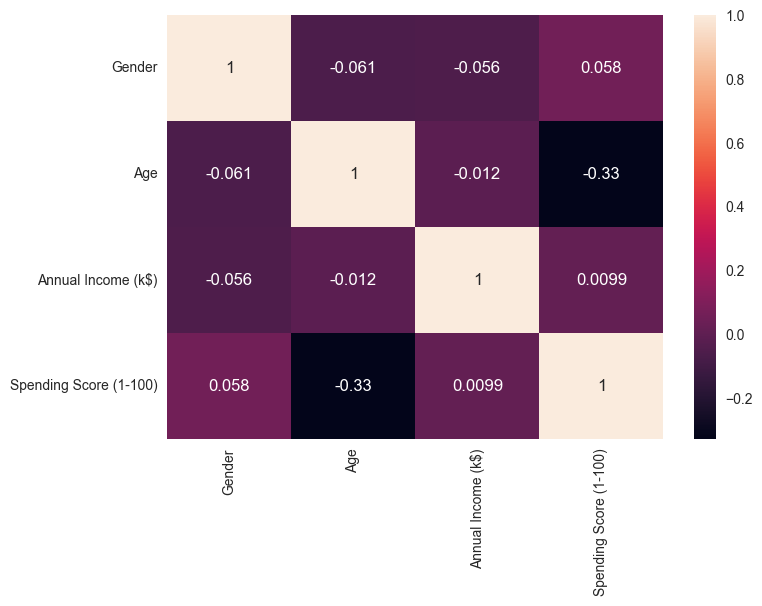

In [84]:
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [85]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

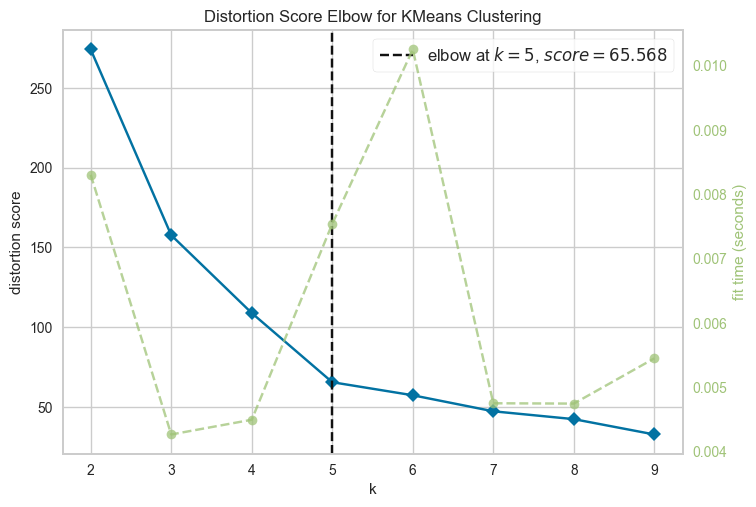

In [86]:
model = KMeans(
    init='k-means++',
    random_state=0,
    algorithm='elkan'
    )

visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_scaled)
visualizer.show()
plt.show()


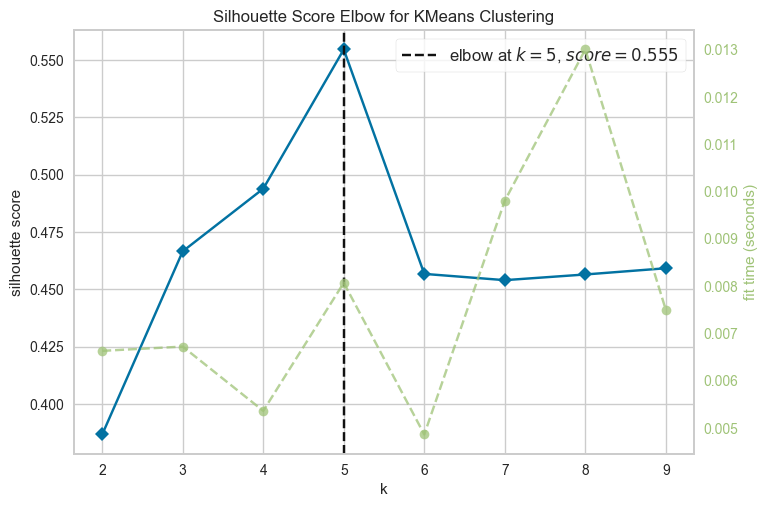

In [87]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_scaled)
visualizer.show()
plt.show()

## Aplicação de modelos

In [88]:
model = KMeans(
    n_clusters=5,
    init='k-means++',
    random_state=0,
    algorithm='elkan'
    )

df['cluster'] = model.fit_predict(X_scaled)

In [89]:
lof = LocalOutlierFactor(n_neighbors=23, contamination='auto')
df['lof_prediction'] = lof.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])

## Resultados

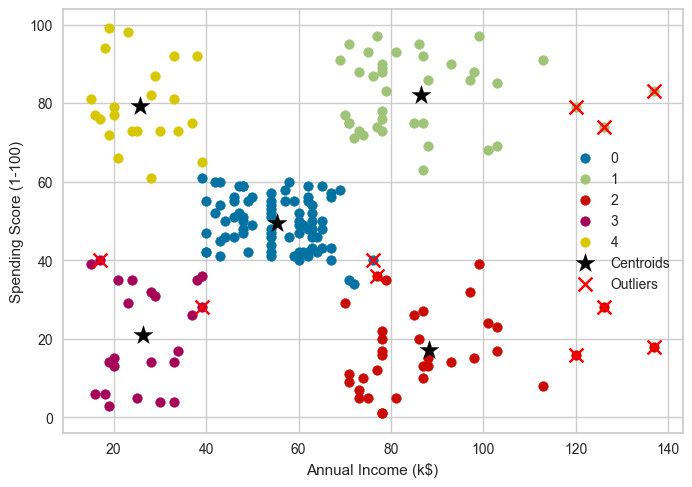

In [90]:
for c in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == c]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=str(c))

centroids_original = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
             c='black', marker='*', s=200, label='Centroids')

outliers = df[df['lof_prediction'] == -1]
plt.scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'],
             c='red', marker='x', s=100, label='Outliers')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [91]:
df.drop(df[df['lof_prediction'] == -1].index, inplace=True)

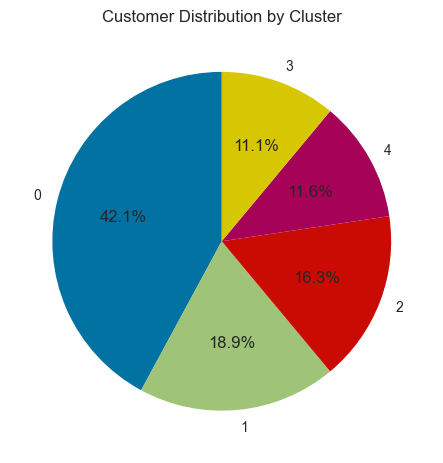

In [92]:
counts = df.cluster.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Distribution by Cluster')
plt.show()

0: Ganha médio gasta médio   
1: Ganha muito gasta muito  
2: Ganha pouco gasta muito  
3: Ganha pouco gasta pouco  
4: Ganha muito gasta pouco  

In [93]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,lof_prediction
0,0,19,15,39,3,1
1,0,21,15,81,4,1
2,1,20,16,6,3,1
3,1,23,16,77,4,1
5,1,22,17,76,4,1
...,...,...,...,...,...,...
189,1,36,103,85,1,1
190,1,34,103,23,2,1
191,1,32,103,69,1,1
192,0,33,113,8,2,1


In [94]:
df['Age'] = df['Age'].astype(int)

<BarContainer object of 5 artists>

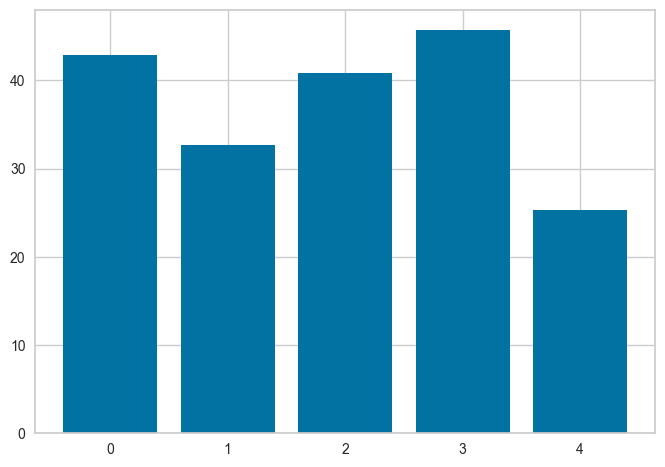

In [95]:
values = []
for c in range(5):
    mean_age = df.loc[df['cluster'] == c, 'Age'].mean()
    values.append(mean_age)
plt.bar(range(5), values)
